# Immigration Data

Let's look into legal immigration patterns into the USA. I found a dataset from the Department of Homeland Security website, and downloaded two datasets in particular, 1. The number of individuals who obtained 'legal resident status' from the year 1820-2022, and 2. The number of individuals who became naturalized citizens from 1907-2022. The population data I used came from the macrotrends website and goes back to 1950.

I want to observe this time series to see if these factors increase or decrease throughout the time series on an absolute basis. I will also observe the time series on a relative basis, with year over year change.

Lastly, I will perform an autoregressive linear regression (with one lag) on annual legal residents, in order to make a 5 year prediction on incoming immigrants.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
residents = pd.read_excel('immigration_data.xlsx', sheet_name='Permanent Residence')
citizens = pd.read_excel('immigration_data.xlsx', sheet_name='Naturalization')
population = pd.read_excel('us_population_data.xlsx')

Observe the dataset.

In [2]:
residents.info()
residents.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 203 entries, 0 to 202
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Year    203 non-null    object
 1   Number  203 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 3.3+ KB


,Year,Number
0,1820,8385
1,1821,9127
2,1822,6911
3,1823,6354
4,1824,7912


In [3]:
citizens.info()
citizens.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 116 entries, 0 to 115
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   year       116 non-null    object
 1   petitions  116 non-null    int64 
 2   accepted   116 non-null    int64 
 3   denied     116 non-null    int64 
dtypes: int64(3), object(1)
memory usage: 3.8+ KB


,year,petitions,accepted,denied
0,1907 1,21113,7941,250
1,1908,44032,25975,3330
2,1909,43141,38374,6341
3,1910,55750,39448,7781
4,1911,74740,56683,9017


Clean the data. I want to make the year columns 'int' data types. And the years in the citizens dataframe have some unwanted characters in some rows.

In [4]:
residents.loc[residents['Year'].str.len() >= 4, 'Year'] = residents['Year'].str[:4]
residents['Year'] = residents['Year'].astype('int')
residents.info()
residents

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 203 entries, 0 to 202
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Year    203 non-null    int64
 1   Number  203 non-null    int64
dtypes: int64(2)
memory usage: 3.3 KB


,Year,Number
0,1820,8385
1,1821,9127
2,1822,6911
3,1823,6354
4,1824,7912
...,...,...
198,2018,1096611
199,2019,1031765
200,2020,707362
201,2021,740002


In [5]:
citizens.loc[citizens['year'].str.len() >= 4, 'year'] = citizens['year'].str[:4]
citizens['year'] = citizens['year'].astype('int')
citizens.info()
citizens

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 116 entries, 0 to 115
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   year       116 non-null    int64
 1   petitions  116 non-null    int64
 2   accepted   116 non-null    int64
 3   denied     116 non-null    int64
dtypes: int64(4)
memory usage: 3.8 KB


,year,petitions,accepted,denied
0,1907,21113,7941,250
1,1908,44032,25975,3330
2,1909,43141,38374,6341
3,1910,55750,39448,7781
4,1911,74740,56683,9017
...,...,...,...,...
111,2018,837168,761901,92631
112,2019,830560,843593,97789
113,2020,967755,628254,80609
114,2021,789119,813861,85170


## Legal Residents per year

The y axis is in millions.

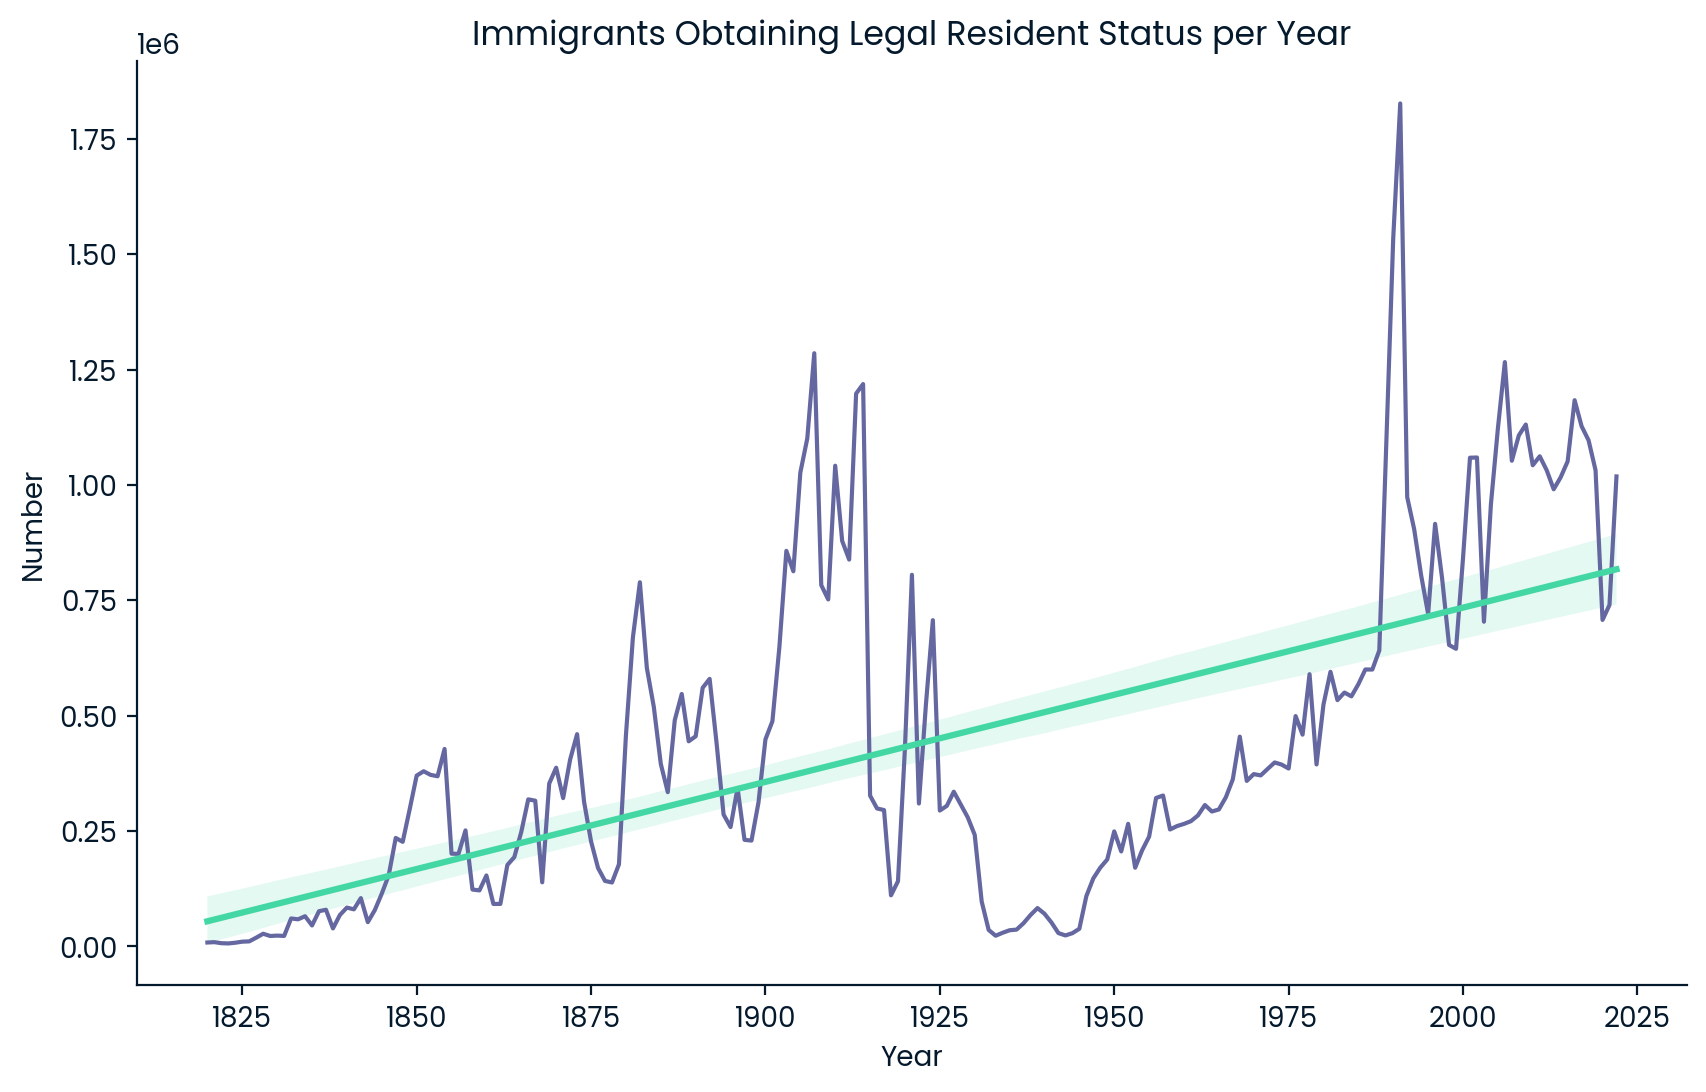

Correlation between time and immigrants:  0.608


In [6]:
fig, ax = plt.subplots(figsize=(10, 6))
sns.lineplot(data=residents, x='Year', y='Number')
sns.regplot(data=residents, x='Year', y='Number', scatter=False, ax=ax)
ax.set_title('Immigrants Obtaining Legal Resident Status per Year')
ax.spines[['top', 'right']].set_visible(False)
plt.show()
print("Correlation between time and immigrants: ", residents['Year'].corr(residents['Number']).round(3))

## Naturalized Citizens per year

The y axis is in millions.

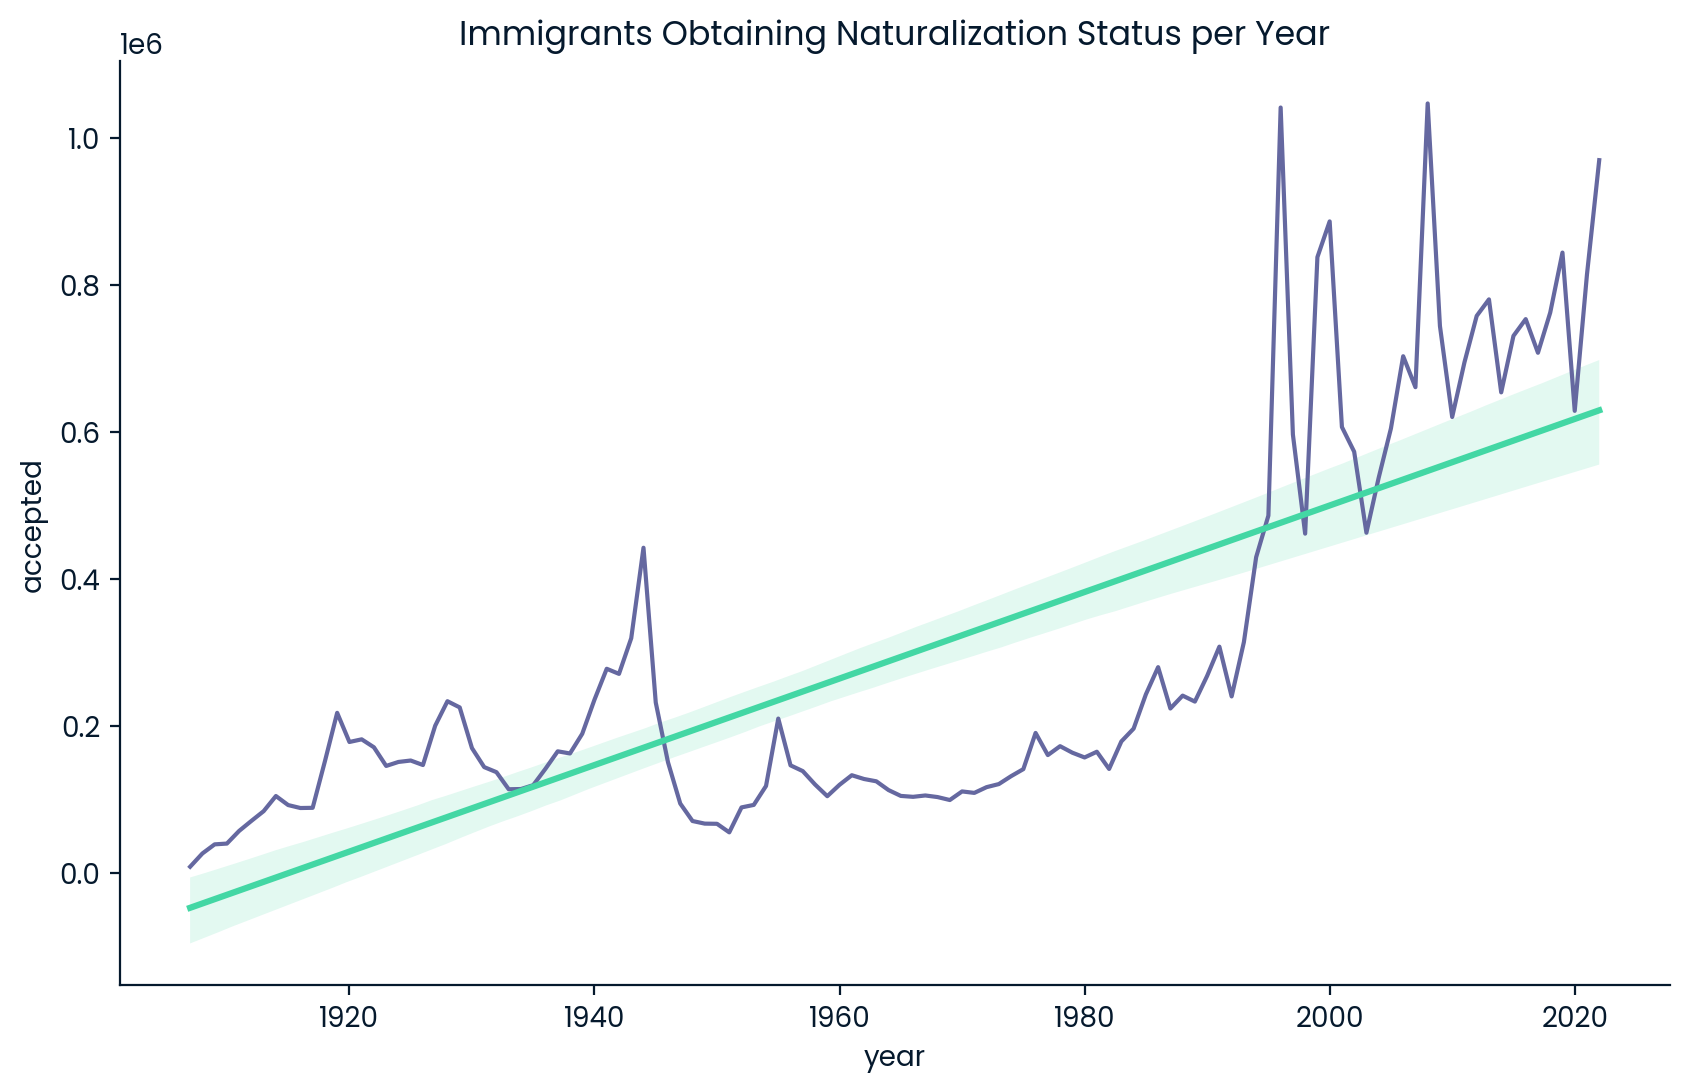

Correlation between time and naturalized citizens:  0.761


In [7]:
fig, ax = plt.subplots(figsize=(10, 6))
sns.lineplot(data=citizens, x='year', y='accepted')
sns.regplot(data=citizens, x='year', y='accepted', scatter=False, ax=ax)
ax.set_title('Immigrants Obtaining Naturalization Status per Year')
ax.spines[['top', 'right']].set_visible(False)
plt.show()
print("Correlation between time and naturalized citizens: ", citizens['year'].corr(citizens['accepted']).round(3))

In [8]:
residents_recent = residents[residents['Year'] > 2000]
residents_recent

,Year,Number
181,2001,1058902
182,2002,1059356
183,2003,703542
184,2004,957883
185,2005,1122257
186,2006,1266129
187,2007,1052415
188,2008,1107126
189,2009,1130818
190,2010,1042625


## Legal Residents since 2001

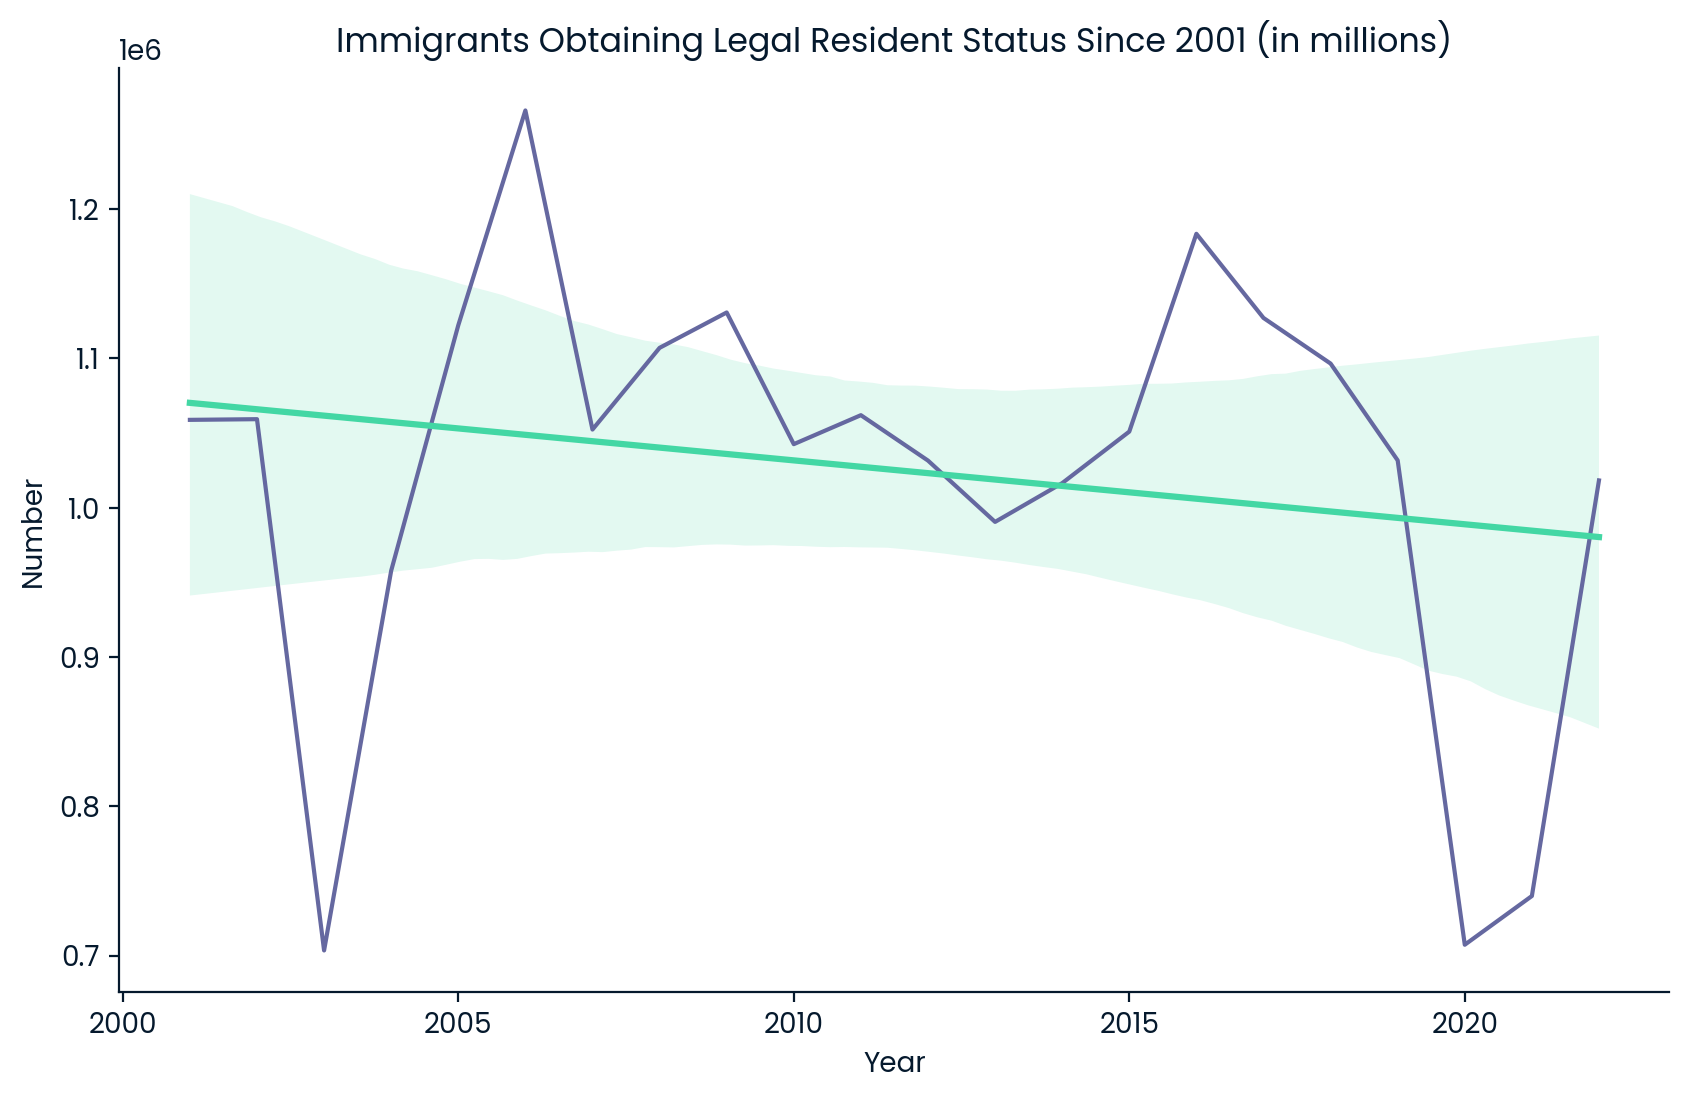

-0.196


In [9]:
fig, ax = plt.subplots(figsize=(10, 6))
sns.lineplot(data=residents_recent, x='Year', y='Number')
sns.regplot(data=residents_recent, x='Year', y='Number', scatter=False, ax=ax)
ax.set_title('Immigrants Obtaining Legal Resident Status Since 2001 (in millions)')
ax.spines[['top', 'right']].set_visible(False)
plt.show()
print(residents_recent['Year'].corr(residents_recent['Number']).round(3))

In [10]:
citizens_recent = citizens[citizens['year'] > 2000]
citizens_recent

,year,petitions,accepted,denied
94,2001,501643,606259,218326
95,2002,700649,572646,139779
96,2003,523370,462435,91599
97,2004,662796,537151,103339
98,2005,602972,604280,108247
99,2006,730642,702589,120722
100,2007,1382993,660477,89683
101,2008,525786,1046539,121283
102,2009,570442,743715,109832
103,2010,710544,619913,56994


## Naturalized Citizens since 2001

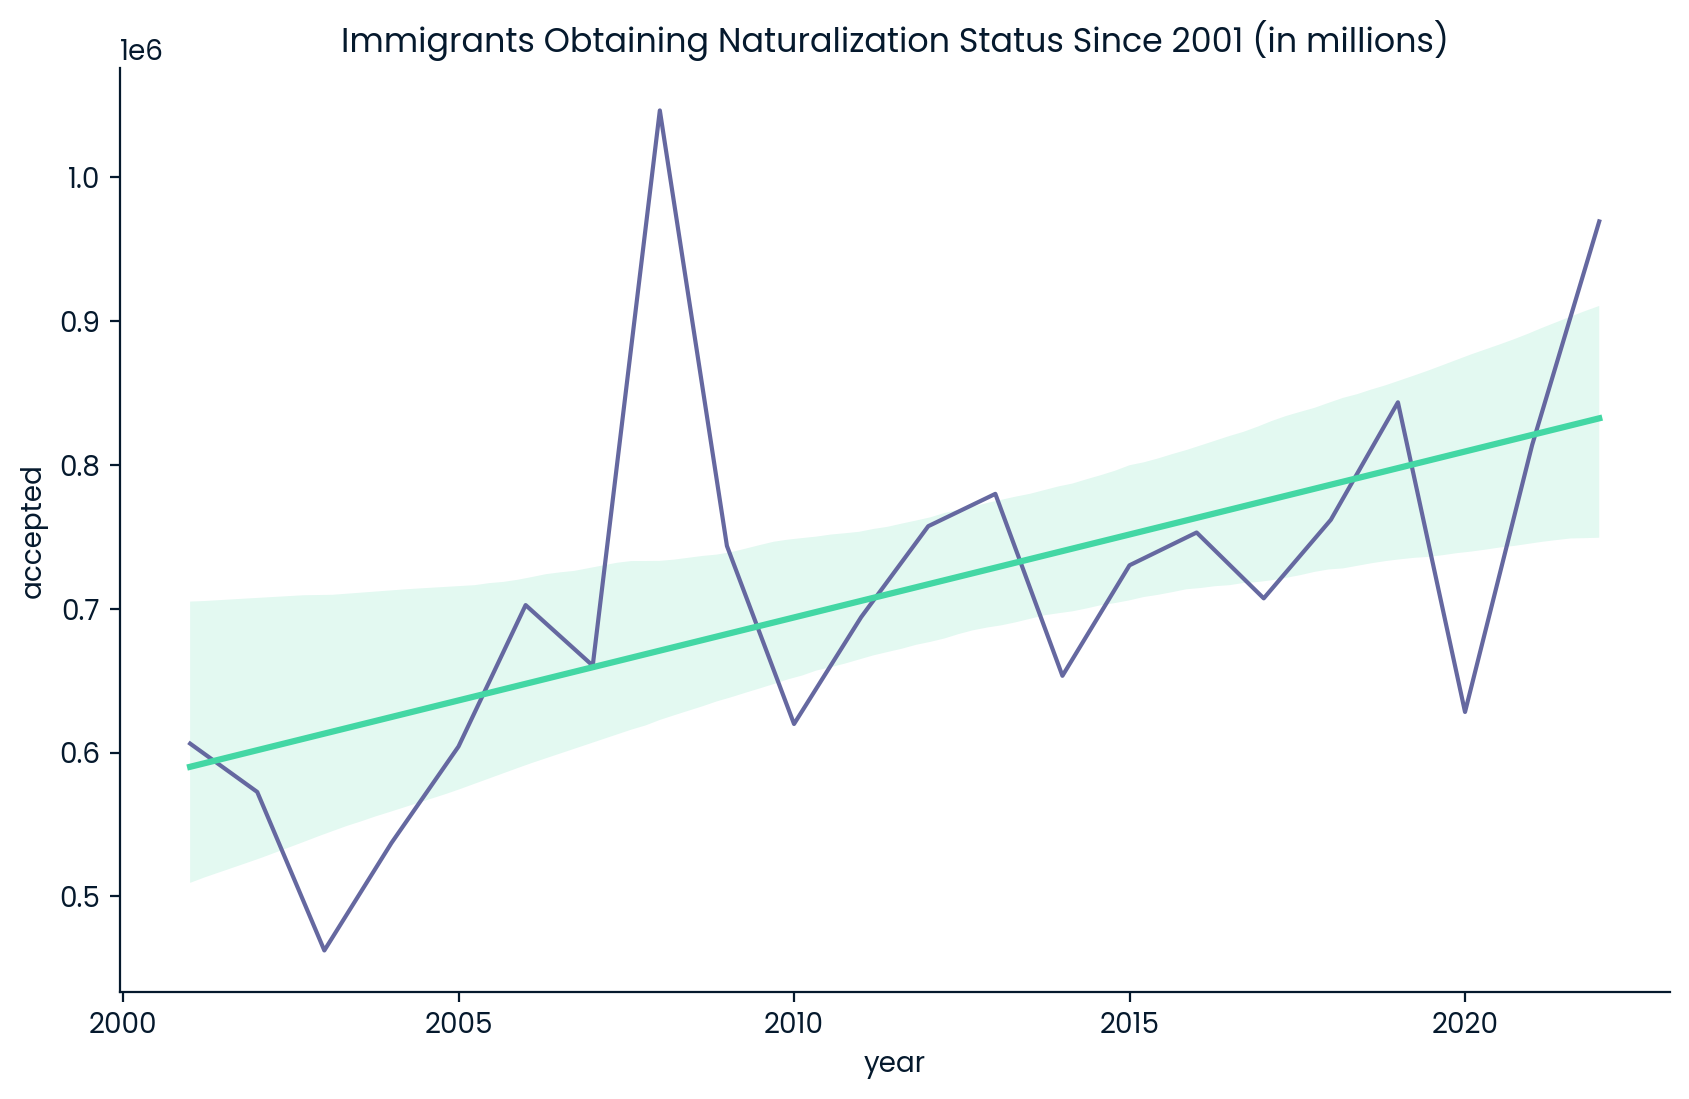

0.561


In [11]:
fig, ax = plt.subplots(figsize=(10, 6))
sns.lineplot(data=citizens_recent, x='year', y='accepted')
sns.regplot(data=citizens_recent, x='year', y='accepted', scatter=False, ax=ax)
ax.set_title('Immigrants Obtaining Naturalization Status Since 2001 (in millions)')
ax.spines[['top', 'right']].set_visible(False)
plt.show()
print(citizens_recent['year'].corr(citizens_recent['accepted']).round(3))

## Top 20 legal residents years

In [12]:
top_20_res = residents.sort_values('Number', ascending=False).head(20)
top_20_res

,Year,Number
171,1991,1826595
170,1990,1535872
87,1907,1285349
186,2006,1266129
94,1914,1218480
93,1913,1197892
196,2016,1183505
189,2009,1130818
197,2017,1127167
185,2005,1122257


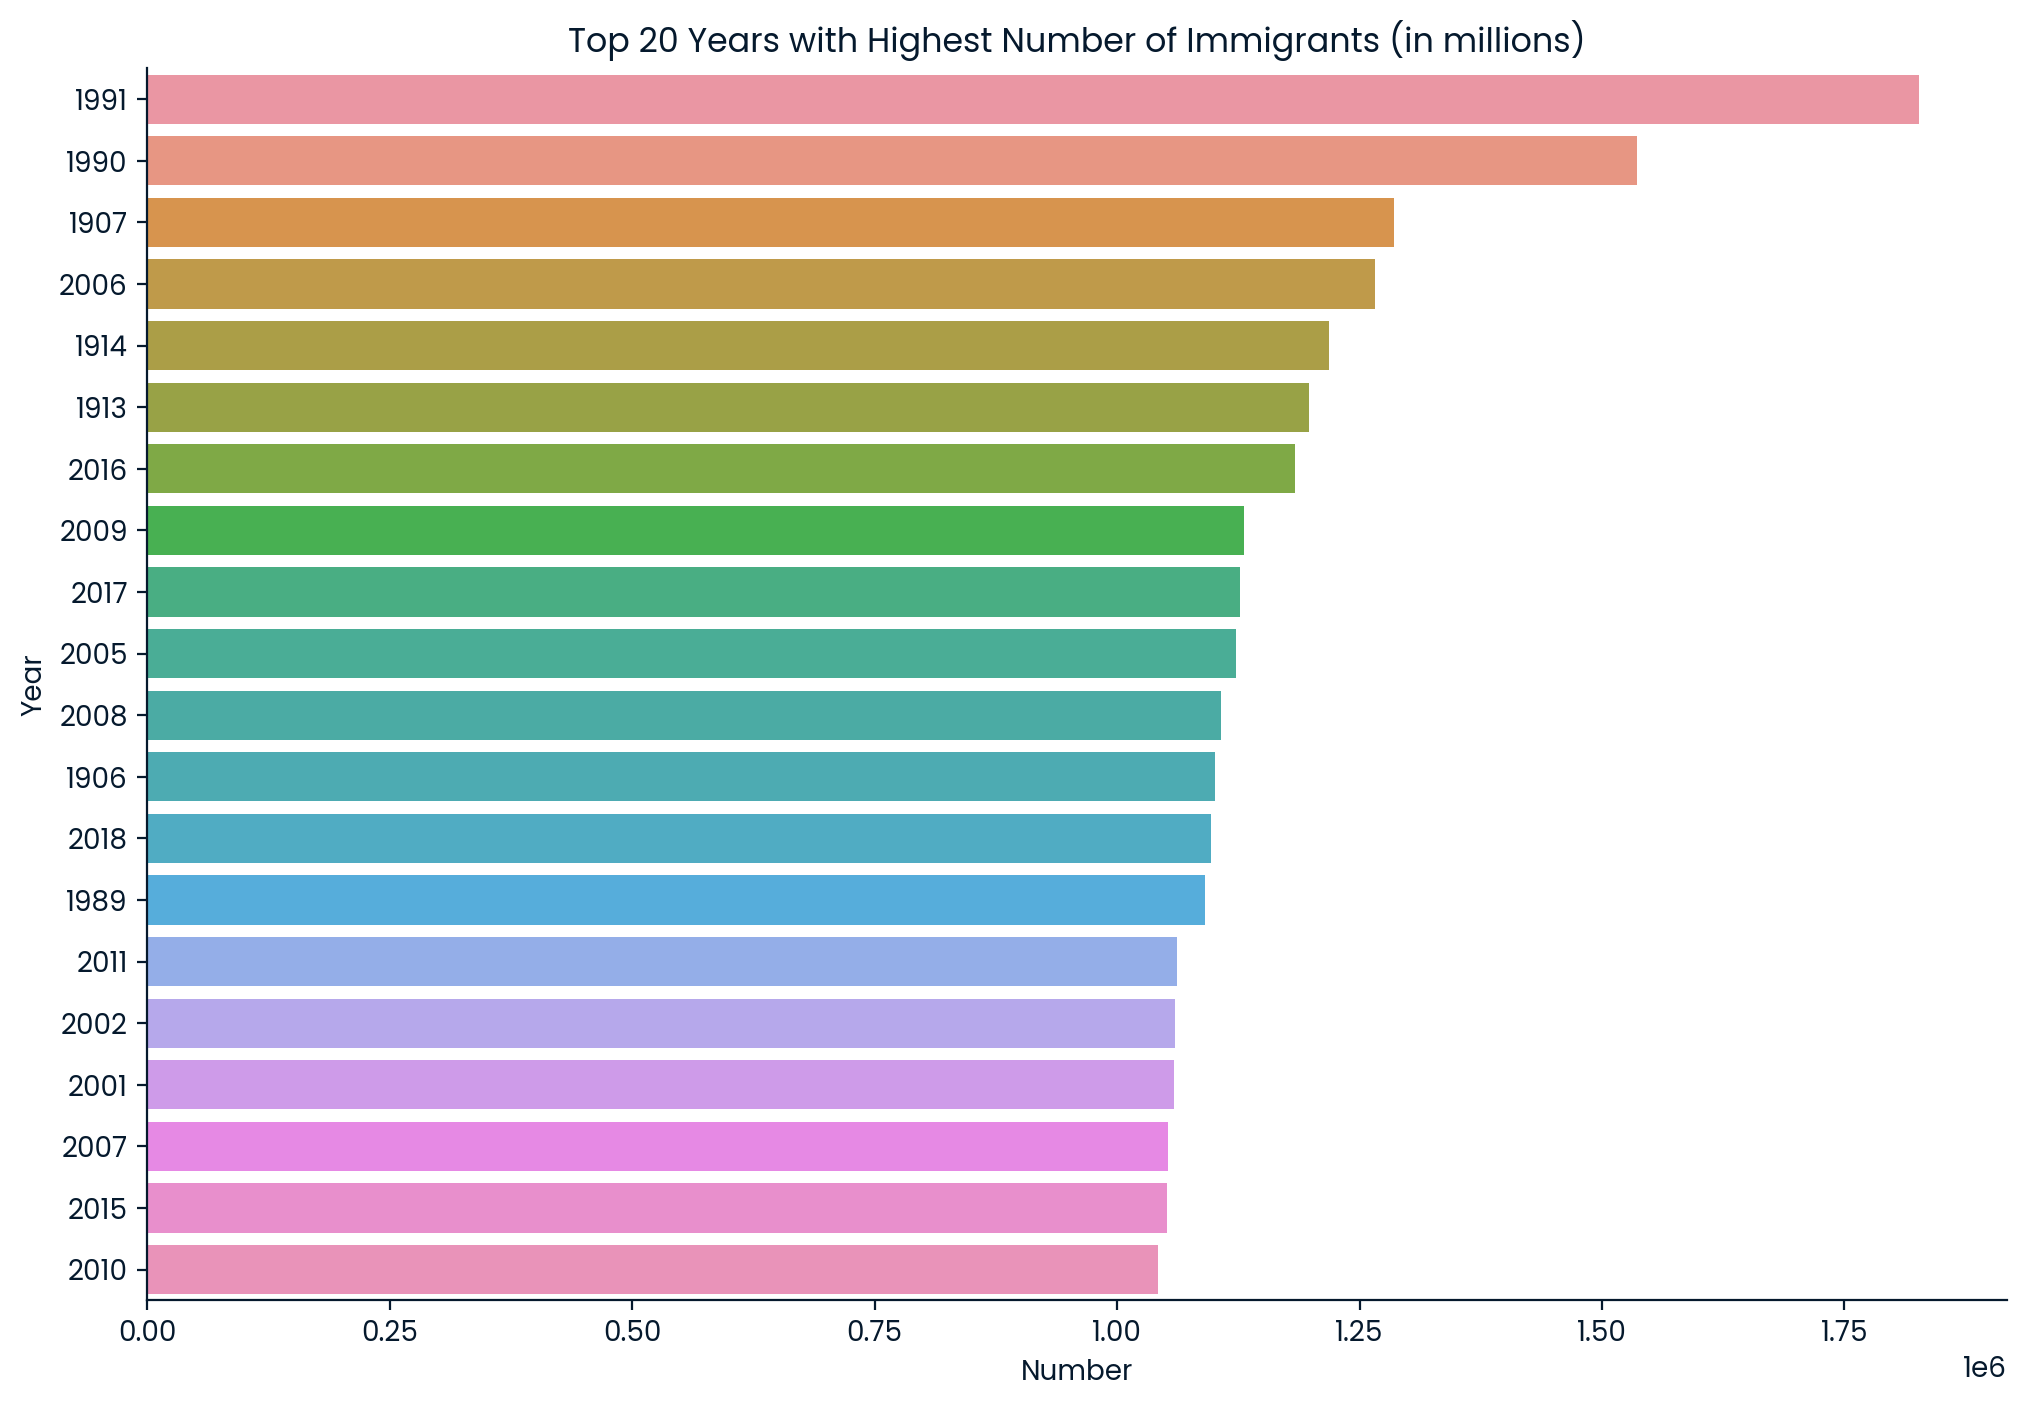

In [13]:
fig, ax = plt.subplots(figsize=(12, 8))
sns.barplot(data=top_20_res, y='Year', x='Number', order=top_20_res['Year'], orient='h')
ax.set_title('Top 20 Years with Highest Number of Immigrants (in millions)')
ax.spines[['top', 'right']].set_visible(False)
plt.show()

## Top 20 naturalized citizens years

In [14]:
top_20_cit = citizens.sort_values('accepted', ascending=False).head(20)
top_20_cit

,year,petitions,accepted,denied
101,2008,525786,1046539,121283
89,1996,1277403,1040991,229842
115,2022,781075,969380,111637
93,2000,460916,886026,399670
112,2019,830560,843593,97789
92,1999,765346,837418,379993
114,2021,789119,813861,85170
106,2013,772623,779929,83112
111,2018,837168,761901,92631
105,2012,899162,757434,65874


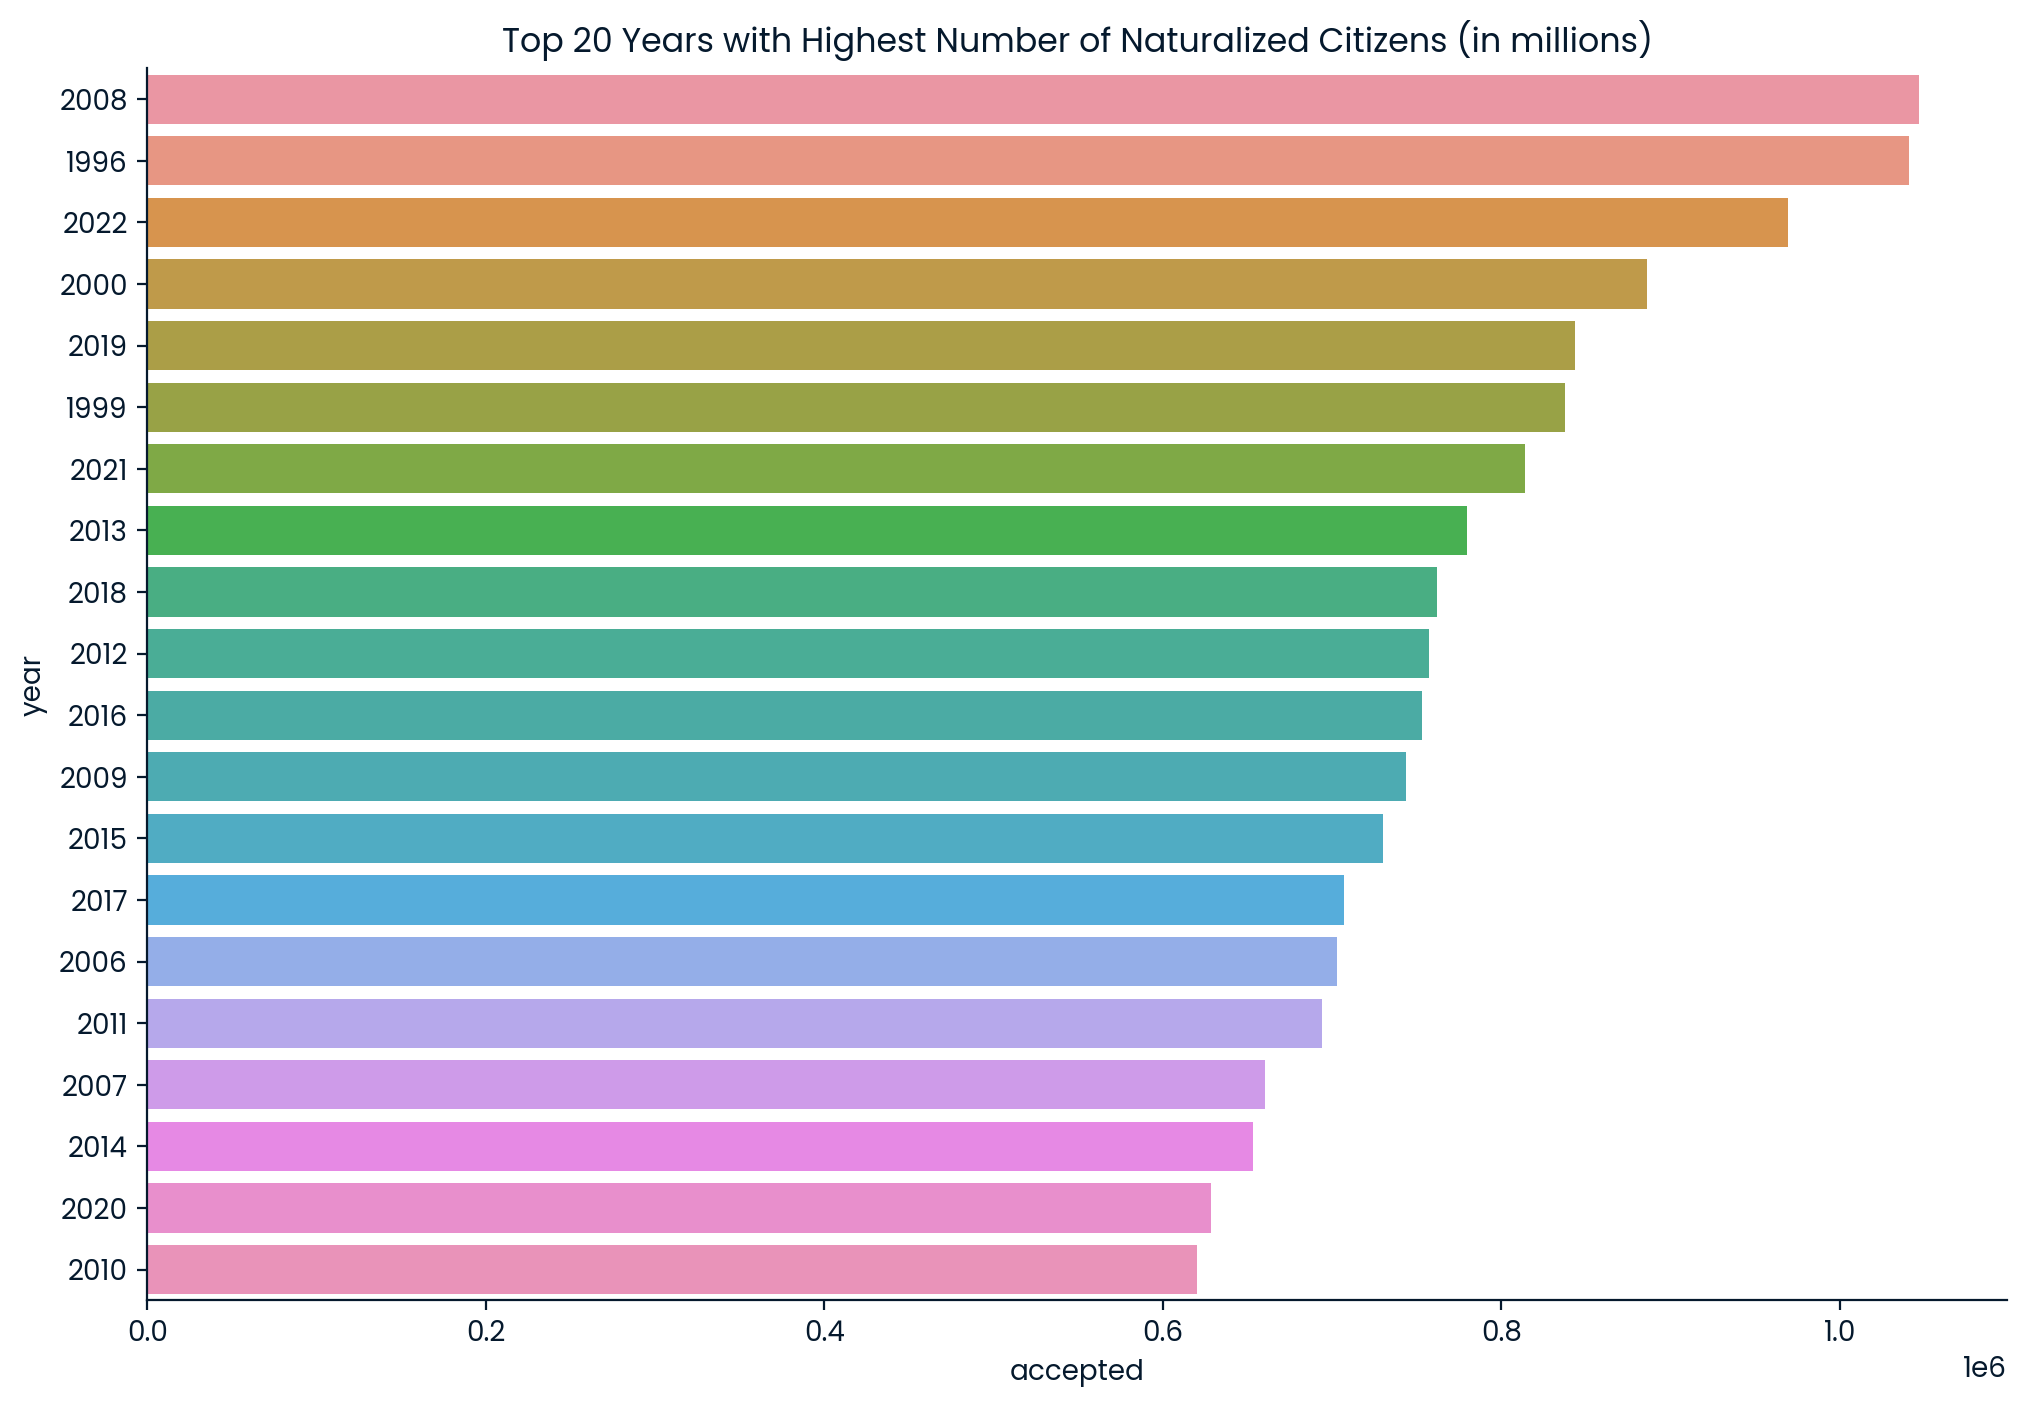

In [15]:
fig, ax = plt.subplots(figsize=(12, 8))
sns.barplot(data=top_20_cit, y='year', x='accepted', order=top_20_cit['year'], orient='h')
ax.set_title('Top 20 Years with Highest Number of Naturalized Citizens (in millions)')
ax.spines[['top', 'right']].set_visible(False)
plt.show()

Now, join the 'population' dataset to each of the 'residents' and 'citizens' datasets so I can perform the regressions

In [16]:
population.info()
population.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74 entries, 0 to 73
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   date            74 non-null     datetime64[ns]
 1   population      74 non-null     int64         
 2   percent_change  73 non-null     float64       
dtypes: datetime64[ns](1), float64(1), int64(1)
memory usage: 1.9 KB


,date,population,percent_change
0,1950-12-31,148281550,NaN
1,1951-12-31,150598453,1.56
2,1952-12-31,152941727,1.56
3,1953-12-31,155451199,1.64
4,1954-12-31,158205873,1.77


Extract the year from the date time data type in the date columns

In [17]:
population['year'] = population['date'].dt.year

In [18]:
population.info()
population.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74 entries, 0 to 73
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   date            74 non-null     datetime64[ns]
 1   population      74 non-null     int64         
 2   percent_change  73 non-null     float64       
 3   year            74 non-null     int32         
dtypes: datetime64[ns](1), float64(1), int32(1), int64(1)
memory usage: 2.1 KB


,date,population,percent_change,year
0,1950-12-31,148281550,NaN,1950
1,1951-12-31,150598453,1.56,1951
2,1952-12-31,152941727,1.56,1952
3,1953-12-31,155451199,1.64,1953
4,1954-12-31,158205873,1.77,1954


In [19]:
population = population[['year', 'population', 'percent_change']]
population.info()
population.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74 entries, 0 to 73
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   year            74 non-null     int32  
 1   population      74 non-null     int64  
 2   percent_change  73 non-null     float64
dtypes: float64(1), int32(1), int64(1)
memory usage: 1.6 KB


,year,population,percent_change
0,1950,148281550,NaN
1,1951,150598453,1.56
2,1952,152941727,1.56
3,1953,155451199,1.64
4,1954,158205873,1.77


In [20]:
res_pop = pd.merge(residents, population, left_on='Year', right_on='year')
res_pop

,Year,Number,year,population,percent_change
0,1950,249187,1950,148281550,NaN
1,1951,205717,1951,150598453,1.56
2,1952,265520,1952,152941727,1.56
3,1953,170434,1953,155451199,1.64
4,1954,208177,1954,158205873,1.77
...,...,...,...,...,...
68,2018,1096611,2018,332140037,0.71
69,2019,1031765,2019,334319671,0.66
70,2020,707362,2020,335942003,0.49
71,2021,740002,2021,336997624,0.31


In [21]:
res_pop = res_pop.drop('year', axis=1)
res_pop

,Year,Number,population,percent_change
0,1950,249187,148281550,NaN
1,1951,205717,150598453,1.56
2,1952,265520,152941727,1.56
3,1953,170434,155451199,1.64
4,1954,208177,158205873,1.77
...,...,...,...,...
68,2018,1096611,332140037,0.71
69,2019,1031765,334319671,0.66
70,2020,707362,335942003,0.49
71,2021,740002,336997624,0.31


In [31]:
res_pop['per_capita'] = (res_pop['Number'] / res_pop['population']).round(5)
res_pop

,Year,Number,population,percent_change,per_capita
0,1950,249187,148281550,NaN,0.00168
1,1951,205717,150598453,1.56,0.00137
2,1952,265520,152941727,1.56,0.00174
3,1953,170434,155451199,1.64,0.00110
4,1954,208177,158205873,1.77,0.00132
...,...,...,...,...,...
68,2018,1096611,332140037,0.71,0.00330
69,2019,1031765,334319671,0.66,0.00309
70,2020,707362,335942003,0.49,0.00211
71,2021,740002,336997624,0.31,0.00220


## Immigrants per Capita

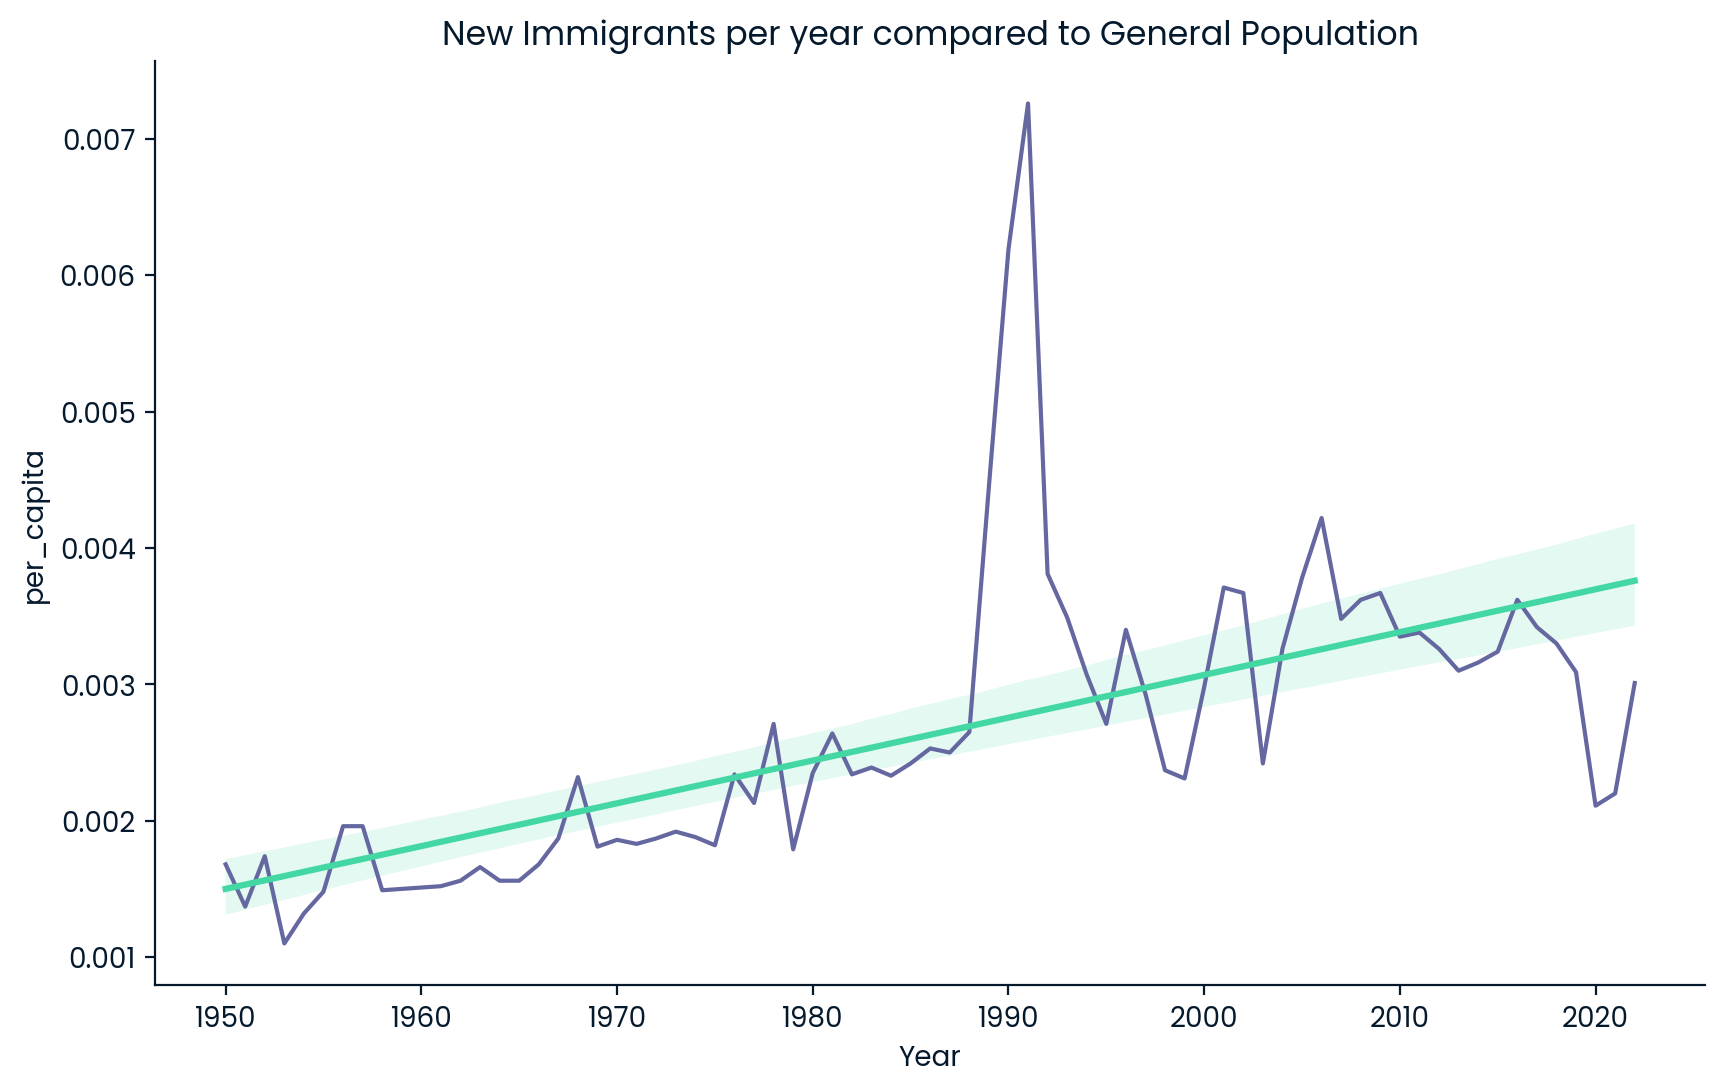

0.626


In [32]:
fig, ax = plt.subplots(figsize=(10, 6))
sns.lineplot(data=res_pop, x='Year', y='per_capita')
sns.regplot(data=res_pop, x='Year', y='per_capita', scatter=False, ax=ax)
ax.set_title('New Immigrants per year compared to General Population')
ax.spines[['top', 'right']].set_visible(False)
plt.show()
print(res_pop['Year'].corr(res_pop['per_capita']).round(3))

## Correlation: population and immigration

In [24]:
res_pop[['Number', 'population']].corr().round(3)

,Number,population
Number,1.000,0.818
population,0.818,1.000


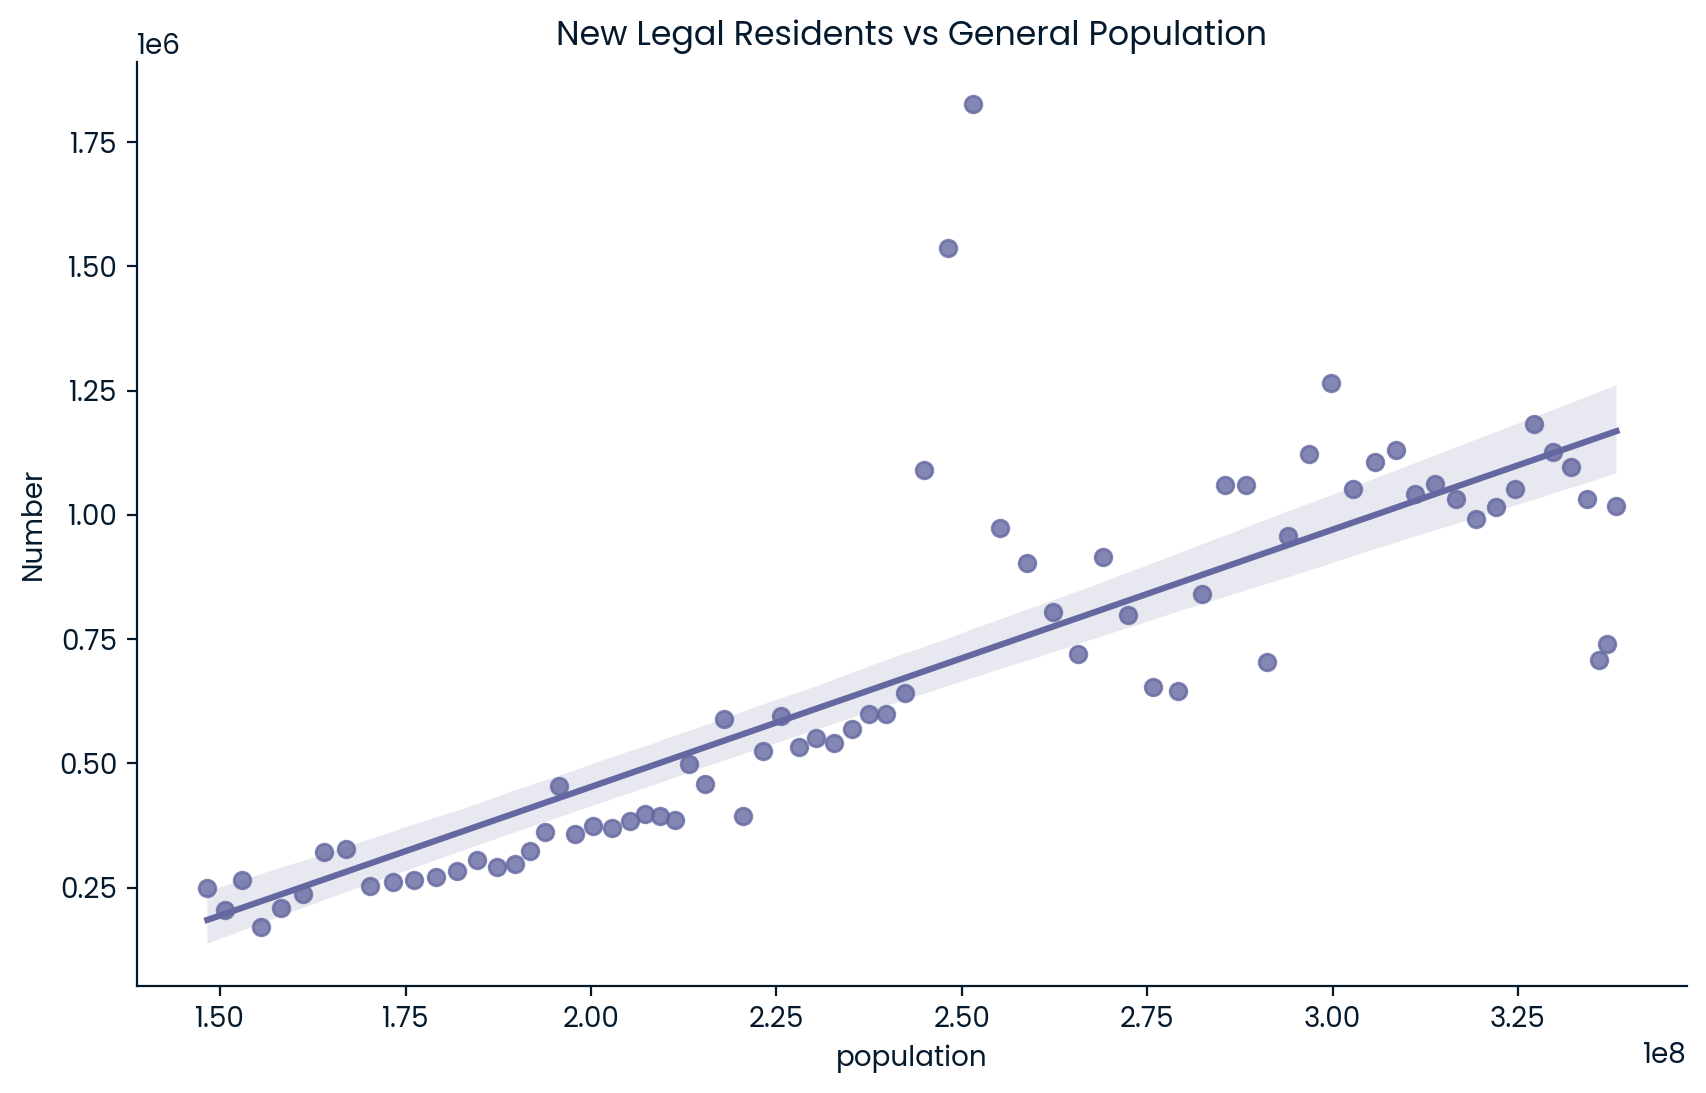

0.818


In [33]:
fig, ax = plt.subplots(figsize=(10, 6))
sns.regplot(data=res_pop, x='population', y='Number')
ax.set_title('New Legal Residents vs General Population')
ax.spines[['top', 'right']].set_visible(False)
plt.show()
print(res_pop['population'].corr(res_pop['Number']).round(3))

## Regression: AR(1) on residents

In [26]:
model = sm.tsa.AutoReg(residents['Number'], lags=1).fit()
print(model.params)
model.summary()

const        43479.436781
Number.L1        0.911104
dtype: float64


<class 'statsmodels.iolib.summary.Summary'>
"""
                            AutoReg Model Results                             
==============================================================================
Dep. Variable:                 Number   No. Observations:                  203
Model:                     AutoReg(1)   Log Likelihood               -2696.945
Method:               Conditional MLE   S.D. of innovations         152097.275
Date:                Thu, 23 May 2024   AIC                           5399.890
Time:                        15:31:23   BIC                           5409.815
Sample:                             1   HQIC                          5403.906
                                  203                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       4.348e+04   1.67e+04      2.610      0.009    1.08e+04    7.61e+04
Number.L1      0.9111      0.030     30.882      0.000       0.853       0.969
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.0976           +0.0000j            1.0976            0.0000
-----------------------------------------------------------------------------
"""

In [27]:
predictions = pd.DataFrame({'Year': [2023, 2024, 2025, 2026, 2027, 2028], 'Number': model.predict(start=len(residents), end=len(residents)+5, dynamic=True)})
predictions['Number'] = predictions['Number'].round(0)
predictions

,Year,Number
203,2023,971301.0
204,2024,928435.0
205,2025,889380.0
206,2026,853797.0
207,2027,821377.0
208,2028,791839.0


In [28]:
forecast = pd.merge(residents, predictions, on='Year', how='outer')
forecast

,Year,Number_x,Number_y
0,1820,8385.0,NaN
1,1821,9127.0,NaN
2,1822,6911.0,NaN
3,1823,6354.0,NaN
4,1824,7912.0,NaN
...,...,...,...
204,2024,NaN,928435.0
205,2025,NaN,889380.0
206,2026,NaN,853797.0
207,2027,NaN,821377.0


In [29]:
forecast['Number'] = forecast.apply(
    lambda row: row['Number_x'] if pd.notnull(row['Number_x']) else row['Number_y'], axis=1)
forecast = forecast.drop(columns=['Number_x', 'Number_y'])
forecast

,Year,Number
0,1820,8385.0
1,1821,9127.0
2,1822,6911.0
3,1823,6354.0
4,1824,7912.0
...,...,...
204,2024,928435.0
205,2025,889380.0
206,2026,853797.0
207,2027,821377.0


## 5 year residents forecast

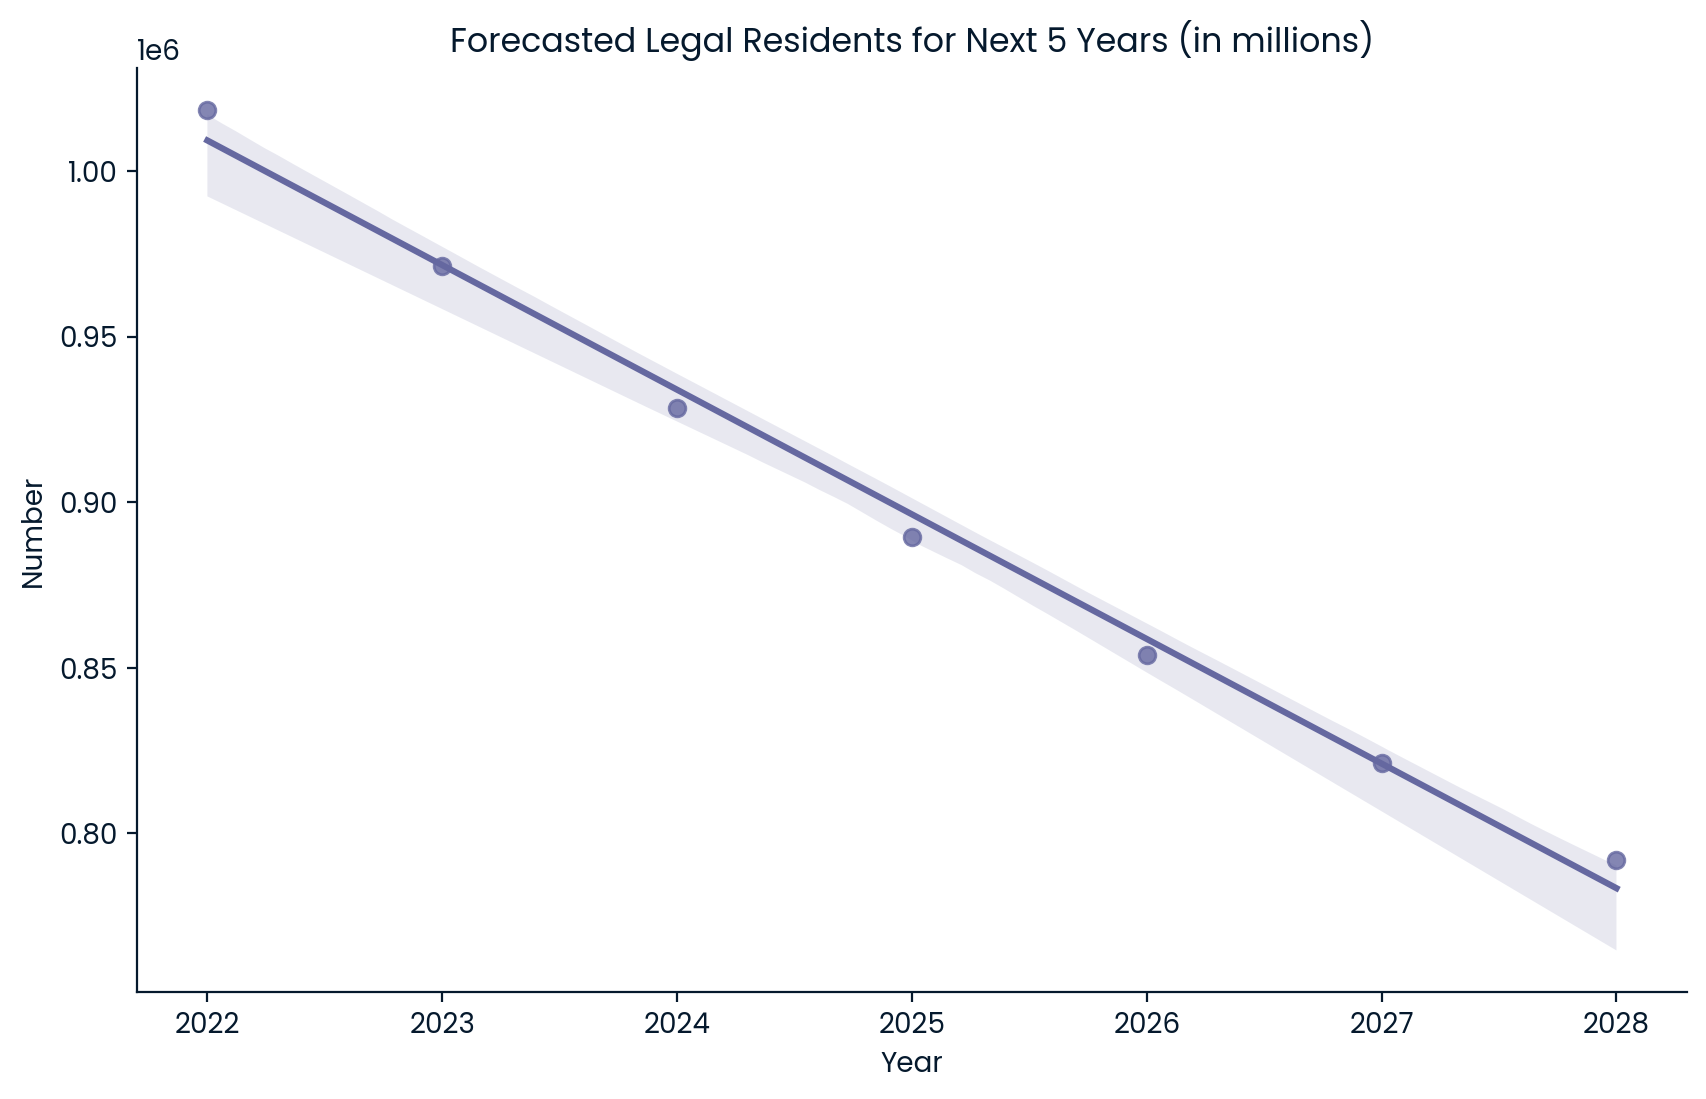

In [30]:
fig, ax = plt.subplots(figsize=(10, 6))
sns.regplot(data=forecast[forecast['Year'] >= 2022], y='Number', x='Year')
ax.set_title('Forecasted Legal Residents for Next 5 Years (in millions)')
ax.spines[['top', 'right']].set_visible(False)
plt.show()

# Conclusion

Immigration and naturalization appear to trend upward over time. The time series plot for immigration shows a correlation between time and immigration of 0.608 which is a moderately positive relationship between the two. The correlation between time and naturalization is even better, with a correlation of 0.761. There appears to be 2 major spikes in immigration dating back to 1820. This first major spike is from the late 1890s to the early 1920s. A second, steeper yet shorter spike was in the early 1990s. 

Moving closer to the present, I plotted immigration and naturalization from the year 2001 to the present. Immigration during this time varied anywhere from 700,000 to 1.3 million, with a slight downward trend as shown by the -0.196 correlation. Conversely, naturalization showed a moderate positive trend during this time, showing a 0.561 correlation between time and naturalization.

Next, I looked at the top 20 years with highest immigration and naturalization numbers. Notably, 10 of the top 20 immigration years were in the last 20 years. 1990, and 1991 are the two years with the highest immigration numbers. And for naturalization numbers, all but 3 of the top 20 years were from the last 20 years. The highest of all was 2008.

After observing the trend of absolute immigration numbers over time, I looked at whether the relative trend of immigration over time was similar. I calculated immigrants per capita by dividing numbers by population each year. This metric also displayed a positive trend with a correlation of 0.626. That correlation is very close to the absolute metric, which showed a correlation of 0.608. It seems as though immigration continues to increase over time.

Up to now, we've been using time as the explanatory variable. Now let's see if the general population has any relationship with immigration. I plotted a scatterplot of population vs. immigration along with their correlation. The correlation was 0.818, which shows a strong positive relationship between the two categories. It seems that immigration numbers growing almost at the same rate as the general population. I wonder if the U.S. government intentionally targets certain immigration numbers as a percentage of population?

The most interesting (not to mention confusing) insight from this analysis came from my last step. I wanted to conduct a regression analysis in order to predict the next few years of immigration numbers. After testing out some different regressions, I found that the best model seemed to be an autoregressive model with one lag period so I used that. The intercept term and the one coefficient were statistically significant with p-values close to 0. Both t-statistics were above 2. I forecasted through the year 2028, and what surprised me is that the values show a slight downward trend during the prediction years. All throughout the dataset, there has been an upward trend. So, my theory is that the model picked up the downward trend of the last 20-25 years. There was also that giant immigration spike in the early 1990s. Autoregressive models can pick up short-term patterns. 

It will be interesting to see if immigration numbers do indeed begin a negative trend moving forward. It would also be good to investigate whether the government identifies particular targets or ranges on immigration based on population or some other metric. We could also improve upon the analysis of population and immigration by using more population data. The dataset I used goes back to 1950, but I'm sure the U.S. Census data goes back much further.

## Sources

https://www.dhs.gov/ohss/topics/immigration/yearbook/2022

https://www.macrotrends.net/global-metrics/countries/USA/united-states/population